# Montgomery County Class Reimbursements
>##   DATA 201 Project 2 - May 12, 2022
>##   Rick Rice, Soojin Kim, Miriam Schoenbaum, Carina Jeon, Robert Xiong and Jannety Mosley

We begin by reading Montgomery County website csv data, which was first downloaded to the PC and read from there into Colab.
  Data source:  https://data.montgomerycountymd.gov/Education/Total-of-classes/a4zf-vq7k



In [3]:
import pandas as pd
path = "/content/Total___of_classes.csv"
# path = "/Total___of_classes.csv"
# path = "/content/Total___of_classes.csv"
class_df = pd.read_csv(path)                 # error_bad_lines=False,dtype={"Local Case Number":str})


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

## Wrangling Departments

A graphable data set of Department counts is created for visualization purposes.  

In [4]:
class_df['Department'].value_counts()

Police                                        1202
Fire/Rescue Services                           830
Health & Human Services                        701
Transportation                                 232
Correction & Rehabilitation                    226
General Services                               120
Liquor Control                                  89
Investment Trustees                             59
Housing & Community Affairs                     55
Finance                                         53
Technology Services                             50
Recreation                                      48
Libraries                                       45
State's Attorney                                45
Environmental Protection                        43
Human Resources                                 38
Public Information                              36
Permitting Services                             31
Community Use Public Facilities                 29
County Attorney                

In [5]:
Dept_value_counts = class_df['Department'].value_counts()
print(type(Dept_value_counts))
Dept_names_ix = Dept_value_counts.index
Dept_names_df = pd.DataFrame(Dept_names_ix)

<class 'pandas.core.series.Series'>


In [6]:
Dept_names_df


,0
0,Police
1,Fire/Rescue Services
2,Health & Human Services
3,Transportation
4,Correction & Rehabilitation
5,General Services
6,Liquor Control
7,Investment Trustees
8,Housing & Community Affairs
9,Finance


In [7]:
Dept_count_df = class_df['Department'].value_counts().to_frame()
Dept_count_df

,Department
Police,1202
Fire/Rescue Services,830
Health & Human Services,701
Transportation,232
Correction & Rehabilitation,226
General Services,120
Liquor Control,89
Investment Trustees,59
Housing & Community Affairs,55
Finance,53


In [8]:
Dept_count_df = Dept_count_df.reset_index(drop=True)
Dept_count_df

,Department
0,1202
1,830
2,701
3,232
4,226
5,120
6,89
7,59
8,55
9,53


In [9]:
Dept_df = Dept_names_df.join(Dept_count_df)
Dept_df.rename(columns={'Department':'Count',0:'Department'},inplace=True)
Dept_df

,Department,Count
0,Police,1202
1,Fire/Rescue Services,830
2,Health & Human Services,701
3,Transportation,232
4,Correction & Rehabilitation,226
5,General Services,120
6,Liquor Control,89
7,Investment Trustees,59
8,Housing & Community Affairs,55
9,Finance,53


## Wrangling Schools

Montgomery College and other schools appear under multiple names.  These are all renamed to a single common name for each school.
A graphable data set is created for schools.


In [10]:
pd.set_option('display.max_rows', 500)
class_df['School'].value_counts(ascending=False)

University of Maryland - University College                                             657
Montgomery College Rockville Campus                                                     217
UNIVERSITY OF MARYLAND, UNIVERSITY COLLEGE                                              205
MONTGOMERY COMMUNITY COLLEGE                                                            188
FREDERICK COMMUNITY COLLEGE                                                             118
MONTGOMERY COUNTY COMMUNITY COLLEGE                                                     100
COLUMBIA SOUTHERN UNIVERSITY                                                             98
University of Maryland - College Park                                                    88
STRAYER UNIVERSITY                                                                       82
LIBERTY UNIVERSITY                                                                       73
NATIONAL ASSOCIATION OF HOUSING AND REDEVELOPMENT OFFICIALS                     

In [11]:
class_df.loc[class_df['School']=='Montgomery College Rockville Campus','School'] = 'Montgomery College'

In [12]:
class_df.loc[class_df['School']=='MONTGOMERY COMMUNITY COLLEGE','School'] = 'Montgomery College'

In [13]:
class_df.loc[class_df['School']=='MONTGOMERY COUNTY COMMUNITY COLLEGE','School'] = 'Montgomery College'

In [14]:
class_df.loc[class_df['School']=='MONTGOMERY COUNTY COLLEGE','School'] = 'Montgomery College'

In [15]:
class_df.loc[class_df['School']=='University of Maryland Global Campus','School'] = 'University of Maryland - University College'

In [16]:
class_df.loc[class_df['School']=='UNIVERSITY OF MARYLAND, UNIVERSITY COLLEGE','School'] = 'University of Maryland - University College'

In [17]:
class_df.loc[class_df['School']=='UNIVERSITY OF MARYLAND, COLLEGE PARK','School'] = 'University of Maryland - College Park'

In [18]:
pd.set_option('display.max_rows', 500)
class_df['School'].value_counts(ascending=False)

University of Maryland - University College                                             927
Montgomery College                                                                      522
FREDERICK COMMUNITY COLLEGE                                                             118
University of Maryland - College Park                                                   109
COLUMBIA SOUTHERN UNIVERSITY                                                             98
STRAYER UNIVERSITY                                                                       82
LIBERTY UNIVERSITY                                                                       73
NATIONAL ASSOCIATION OF HOUSING AND REDEVELOPMENT OFFICIALS                              72
ROPES THAT RESCUE LTD.                                                                   68
University of Maryland - Baltimore                                                       65
UNIVERSITY OF BALTIMORE                                                         

In [ ]:
# School_value_counts = class_df['School'].value_counts()
# School_names_as_index = School_value_counts.index
# School_names_df = pd.DataFrame(School_names_as_index)
# School_count_df = class_df['School'].value_counts().to_frame()
# School_count_df = School_count_df.reset_index(drop=True)
# School_df = School_names_df.join(School_count_df)
# School_df.rename(columns={'School':'Count',0:'School'},inplace=True)

In [19]:
School_names_df = pd.DataFrame(class_df['School'].value_counts().index)
School_count_df = class_df['School'].value_counts().to_frame().reset_index(drop=True)
School_df = School_names_df.join(School_count_df)
School_df.rename(columns={'School':'Count',0:'School'},inplace=True)
School_df

,School,Count
0,University of Maryland - University College,927
1,Montgomery College,522
2,FREDERICK COMMUNITY COLLEGE,118
3,University of Maryland - College Park,109
4,COLUMBIA SOUTHERN UNIVERSITY,98
5,STRAYER UNIVERSITY,82
6,LIBERTY UNIVERSITY,73
7,NATIONAL ASSOCIATION OF HOUSING AND REDEVELOPM...,72
8,ROPES THAT RESCUE LTD.,68
9,University of Maryland - Baltimore,65


## Visualize the Data - Independent variables


In [20]:
class_df.head()


,Department,Major,Degree,Course Title,School,Cost,Course Description
0,Police,Business/Admin./Mgmt.,AA,INTRODUCTION TO BUSINESS,Montgomery College,392.0,An introductory course designed to survey the ...
1,Police,Business/Admin./Mgmt.,AA,MA 160,Montgomery College,392.0,A general calculus course primarily for busine...
2,Police,Business/Admin./Mgmt.,AA,INTRO TO AMERICAN MUSIC,Montgomery College,392.0,A survey of American popular music from the tu...
3,Health & Human Services,Business/Admin./Mgmt.,Masters (MA/MS/MPH/etc.),PUBLIC POLICY ANALYSIS,BOWIE STATE UNIVERSITY,1062.0,Focus is on the analysis of costs and benefits...
4,Health & Human Services,Other/Misc.,Masters (MA/MS/MPH/etc.),MHA 500 CONTEMPORARY ISSUES IN HEALTH CARE,Mount St Mary's University,1569.0,"The historical, current, and future organizati..."


In [21]:
class_df.tail()

,Department,Major,Degree,Course Title,School,Cost,Course Description
4023,Police,Not Specified,Certificate,LWRCI M6/IC ARMORER COURSE,LWRC International,600.0,The LWRCI armorer course is designed to equip ...
4024,Correction & Rehabilitation,Not Listed,Bachelors (BA/BS),TLMT311 INTRODUCTION TO TRANSPORTATION MANAGEMENT,American Public University System,700.0,This course is an overview of the transportati...
4025,Health & Human Services,Psychology,Certificate,FUNDAMENTALS OF SUPERVISION,American Association for Marriage and Family T...,750.0,As part of the application process to become a...
4026,Fire/Rescue Services,Public Administration,Masters (MA/MS/MPH/etc.),LEADERSHIP IN THE PUBLIC SECTOR,Purdue University,1830.0,leadership COURSE FOR MY MASTERS DEGREE IN PUB...
4027,Police,Not Listed,Other,ARMORER'S COURSE,Triton Training Group,1000.0,Student will be provided an in-depth knowledge...


### Cost Analysis

Text(0.5, 1.0, 'Cost of Classes')

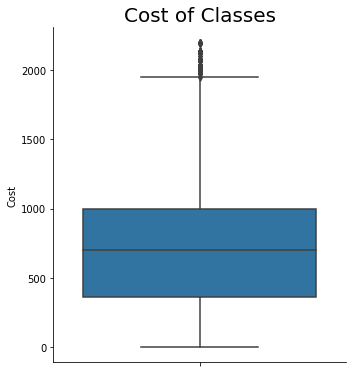

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.catplot(kind='box',data=class_df,y='Cost')
plt.title('Cost of Classes', fontsize = 20)


<Figure size 576x360 with 0 Axes>

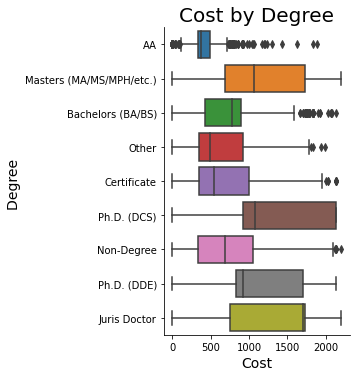

In [23]:
plt.figure(figsize = (8, 5))
sns.catplot(y = 'Degree', x = 'Cost', kind = 'box', data = class_df)
plt.title('Cost by Degree', fontsize = 20)
plt.xlabel('Cost', fontsize = 14)
plt.ylabel('Degree ', fontsize = 14)
plt.show()

In [24]:
class_df['Major'].value_counts()

None                                                                457
Business/Admin./Mgmt.                                               402
Criminal Justice                                                    400
Other/Misc.                                                         270
Not Listed                                                          238
Accounting (Business)                                               187
Health & Human Services                                             148
Nursing                                                             135
Fire Science                                                        126
Psychology                                                          114
Public Administration                                               110
Emergency Management                                                103
Social Work                                                          97
Public Safety                                                   

In [25]:
STEM1 = class_df.Major == 'Information Technology'
STEM2 = class_df.Major == 'Computer Science'
STEM3 = class_df.Major == 'Computer Systems Management'
STEM4 = class_df.Major == 'Civil and Environmental Engineering'
STEM5 = class_df.Major == 'Forensic Science'
STEM6 = class_df.Major == 'Nutritional Sciences'
STEM7 = class_df.Major == 'Environmental Science and Policy (Science)'
STEM8 = class_df.Major == 'Computer Engineering'
STEM9 = class_df.Major == 'Mechanical Engineering'
STEM10 = class_df.Major == 'Engineering (Undecided)'
STEM11 = class_df.Major == 'Mathematics'
STEM12 = class_df.Major == 'Biological Sciences: General Biology'
STEM13 = class_df.Major == 'Biological Sciences: Ecology and Evolution'
STEM14 = class_df.Major == 'Aerospace Engineering'
STEM15 = class_df.Major == 'Kinesiological Sciences'
STEM16 = class_df.Major == 'Electrical Engineering'
STEM17 = class_df.Major == 'Biological Sciences: Cell Biology and Genetics'
STEM18 = class_df.Major == 'Bioengineering'

print(STEM2[20:30])

20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
Name: Major, dtype: bool


In [26]:
z = [1]*4028
for i in range(4028):
    if STEM1[i]:
      z[i] = 0
    elif STEM2[i]:
      z[i] = 0
    elif STEM3[i]:
      z[i] = 0
    elif STEM4[i]:
      z[i] = 0
    elif STEM5[i]:
      z[i] = 0
    elif STEM6[i]:
      z[i] = 0
    elif STEM7[i]:
      z[i] = 0
    elif STEM8[i]:
      z[i] = 0
    elif STEM9[i]:
      z[i] = 0
    elif STEM10[i]:
      z[i] = 0
    elif STEM11[i]:
      z[i] = 0
    elif STEM12[i]:
      z[i] = 0
    elif STEM13[i]:
      z[i] = 0
    elif STEM14[i]:
      z[i] = 0
    elif STEM15[i]:
      z[i] = 0
    elif STEM16[i]:
      z[i] = 0
    elif STEM17[i]:
      z[i] = 0
    elif STEM18[i]:
      z[i] = 0
    

print(z)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 

In [27]:
z_graph = pd.DataFrame(z)
class_df_graph = pd.concat([class_df,z_graph],axis=1)
class_df_graph.rename(columns={0:'STEM'},inplace=True)

In [28]:
class_df_graph['STEM'] = class_df_graph['STEM'].astype(str)

class_df_graph.loc[class_df_graph['STEM']=='1', 'STEM'] = 'Non-STEM'
class_df_graph.loc[class_df_graph['STEM']=='0', 'STEM'] = 'STEM'

class_df_graph

,Department,Major,Degree,Course Title,School,Cost,Course Description,STEM
0,Police,Business/Admin./Mgmt.,AA,INTRODUCTION TO BUSINESS,Montgomery College,392.0,An introductory course designed to survey the ...,Non-STEM
1,Police,Business/Admin./Mgmt.,AA,MA 160,Montgomery College,392.0,A general calculus course primarily for busine...,Non-STEM
2,Police,Business/Admin./Mgmt.,AA,INTRO TO AMERICAN MUSIC,Montgomery College,392.0,A survey of American popular music from the tu...,Non-STEM
3,Health & Human Services,Business/Admin./Mgmt.,Masters (MA/MS/MPH/etc.),PUBLIC POLICY ANALYSIS,BOWIE STATE UNIVERSITY,1062.0,Focus is on the analysis of costs and benefits...,Non-STEM
4,Health & Human Services,Other/Misc.,Masters (MA/MS/MPH/etc.),MHA 500 CONTEMPORARY ISSUES IN HEALTH CARE,Mount St Mary's University,1569.0,"The historical, current, and future organizati...",Non-STEM
...,...,...,...,...,...,...,...,...
4023,Police,Not Specified,Certificate,LWRCI M6/IC ARMORER COURSE,LWRC International,600.0,The LWRCI armorer course is designed to equip ...,Non-STEM
4024,Correction & Rehabilitation,Not Listed,Bachelors (BA/BS),TLMT311 INTRODUCTION TO TRANSPORTATION MANAGEMENT,American Public University System,700.0,This course is an overview of the transportati...,Non-STEM
4025,Health & Human Services,Psychology,Certificate,FUNDAMENTALS OF SUPERVISION,American Association for Marriage and Family T...,750.0,As part of the application process to become a...,Non-STEM
4026,Fire/Rescue Services,Public Administration,Masters (MA/MS/MPH/etc.),LEADERSHIP IN THE PUBLIC SECTOR,Purdue University,1830.0,leadership COURSE FOR MY MASTERS DEGREE IN PUB...,Non-STEM


<Figure size 576x360 with 0 Axes>

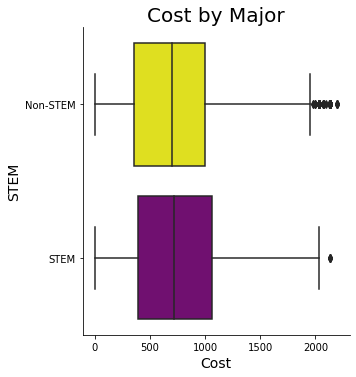

In [29]:
plt.figure(figsize = (8, 5))
sns.catplot(y = 'STEM', x = 'Cost', kind = 'box', data = class_df_graph, palette=['yellow','purple'])
plt.title('Cost by Major', fontsize = 20)
plt.xlabel('Cost', fontsize = 14)
plt.ylabel('STEM', fontsize = 14)
plt.show()

### Department and School

Text(0.5, 1.0, 'Classes Taken by Department')

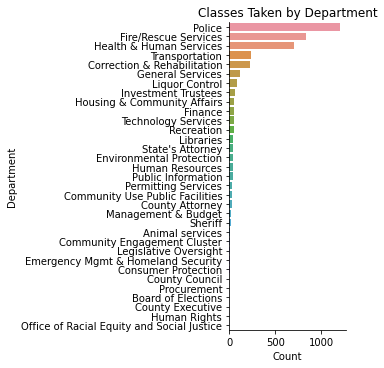

In [30]:

import seaborn as sns
import numpy as np

sns.catplot(kind='bar',data=Dept_df,y='Department',x='Count',orient='h')  #  log_scale=(False,True),orient='h')      
plt.title('Classes Taken by Department', fontsize =12)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Classes Taken by School')

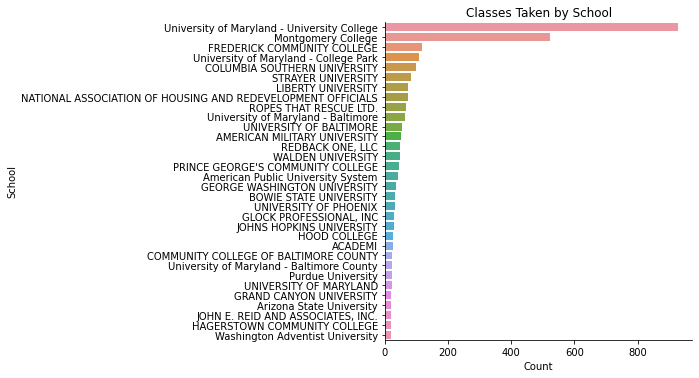

In [31]:
School_dfg =School_df[0:32]     # First 32 of 350 selected to make the graph readable

# sns.displot(kind='hist',data=class_df,x='School',log_scale=(False,True))          
sns.catplot(kind='bar',data=School_dfg,y='School',x='Count',orient='h')      
plt.title('Classes Taken by School', fontsize = 12)

## Data Wrangling for Logistic Regression and Decision Tree

An outcome vector y is created for degree-seeking or non-degree-seeking students.
Dummy variables are created for Schools and Departments.

In [32]:
non_degree_seeking1 = class_df.Degree == 'Non-Degree'
non_degree_seeking2 = class_df.Degree == 'Certificate'
non_degree_seeking3 = class_df.Degree == 'Other'
    
print(non_degree_seeking3[20:30])


20    False
21    False
22    False
23    False
24     True
25     True
26    False
27    False
28    False
29    False
Name: Degree, dtype: bool


In [33]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [34]:
y = [1]*4028
for i in range(4028):
    if non_degree_seeking1[i]:
      y[i] = 0
    elif non_degree_seeking2[i]:
      y[i] = 0
    elif non_degree_seeking3[i]:
      y[i] = 0  

print(y)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 

In [35]:
X_no_dummies = class_df.iloc[:,[0,4,5]]

In [36]:
X_no_dummies.head()

,Department,School,Cost
0,Police,Montgomery College,392.0
1,Police,Montgomery College,392.0
2,Police,Montgomery College,392.0
3,Health & Human Services,BOWIE STATE UNIVERSITY,1062.0
4,Health & Human Services,Mount St Mary's University,1569.0


In [37]:
X = pd.get_dummies(X_no_dummies,columns=['Department','School'],drop_first=True)

In [38]:
X.info()
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4028 entries, 0 to 4027
Columns: 382 entries, Cost to School_YORK COLLEGE OF PENNSYLVANIA
dtypes: float64(1), uint8(381)
memory usage: 1.5 MB


,Cost,Department_Board of Elections,Department_Community Engagement Cluster,Department_Community Use Public Facilities,Department_Consumer Protection,Department_Correction & Rehabilitation,Department_County Attorney,Department_County Council,Department_County Executive,Department_Emergency Mgmt & Homeland Security,...,School_Vyne Education,School_WALDEN UNIVERSITY,School_WIDENER UNIVERSITY SCHOOL OF LAW,School_Waldorf College,School_Washington Adventist University,School_Weber State University,School_West Texas A & M University,School_West Virginia University,School_Wilmington University,School_YORK COLLEGE OF PENNSYLVANIA
0,392.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,392.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,392.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1062.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1569.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Visualize Data - Dependent variables

In [39]:
y_graph = pd.DataFrame(y)
class_df_graph = pd.concat([class_df_graph,y_graph],axis=1)
class_df_graph.rename(columns={0:'degree-seeking'},inplace=True)
class_df_graph

,Department,Major,Degree,Course Title,School,Cost,Course Description,STEM,degree-seeking
0,Police,Business/Admin./Mgmt.,AA,INTRODUCTION TO BUSINESS,Montgomery College,392.0,An introductory course designed to survey the ...,Non-STEM,1
1,Police,Business/Admin./Mgmt.,AA,MA 160,Montgomery College,392.0,A general calculus course primarily for busine...,Non-STEM,1
2,Police,Business/Admin./Mgmt.,AA,INTRO TO AMERICAN MUSIC,Montgomery College,392.0,A survey of American popular music from the tu...,Non-STEM,1
3,Health & Human Services,Business/Admin./Mgmt.,Masters (MA/MS/MPH/etc.),PUBLIC POLICY ANALYSIS,BOWIE STATE UNIVERSITY,1062.0,Focus is on the analysis of costs and benefits...,Non-STEM,1
4,Health & Human Services,Other/Misc.,Masters (MA/MS/MPH/etc.),MHA 500 CONTEMPORARY ISSUES IN HEALTH CARE,Mount St Mary's University,1569.0,"The historical, current, and future organizati...",Non-STEM,1
...,...,...,...,...,...,...,...,...,...
4023,Police,Not Specified,Certificate,LWRCI M6/IC ARMORER COURSE,LWRC International,600.0,The LWRCI armorer course is designed to equip ...,Non-STEM,0
4024,Correction & Rehabilitation,Not Listed,Bachelors (BA/BS),TLMT311 INTRODUCTION TO TRANSPORTATION MANAGEMENT,American Public University System,700.0,This course is an overview of the transportati...,Non-STEM,1
4025,Health & Human Services,Psychology,Certificate,FUNDAMENTALS OF SUPERVISION,American Association for Marriage and Family T...,750.0,As part of the application process to become a...,Non-STEM,0
4026,Fire/Rescue Services,Public Administration,Masters (MA/MS/MPH/etc.),LEADERSHIP IN THE PUBLIC SECTOR,Purdue University,1830.0,leadership COURSE FOR MY MASTERS DEGREE IN PUB...,Non-STEM,1


Text(0, 0.5, ' ')

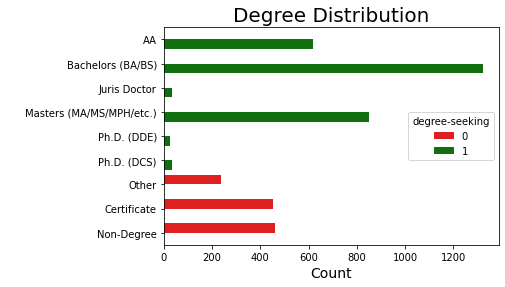

In [40]:
sns.set_style()
class_df_graph_sorted = class_df_graph.sort_values(by=['degree-seeking'],ascending=False)
sns.countplot(y = 'Degree', data = class_df_graph_sorted, hue='degree-seeking',color='blue',palette=['red','green'])
plt.title('Degree Distribution', size = 20)
plt.xlabel('Count', fontsize = 14)
plt.ylabel(' ', fontsize = 14)

In [41]:
grouped = class_df_graph.groupby(class_df_graph['Department'])

In [42]:
class_df_grouped = grouped.get_group('Police')
class_df_grouped = class_df_grouped.append(grouped.get_group('Fire/Rescue Services'))
class_df_grouped = class_df_grouped.append(grouped.get_group('Health & Human Services'))
class_df_grouped = class_df_grouped.append(grouped.get_group('Transportation'))
class_df_grouped = class_df_grouped.append(grouped.get_group('Correction & Rehabilitation'))
class_df_grouped = class_df_grouped.append(grouped.get_group('General Services'))
class_df_grouped = class_df_grouped.append(grouped.get_group('Liquor Control'))
class_df_grouped = class_df_grouped.append(grouped.get_group('Housing & Community Affairs'))
class_df_grouped = class_df_grouped.append(grouped.get_group('Finance'))
class_df_grouped = class_df_grouped.append(grouped.get_group('Technology Services'))
class_df_grouped = class_df_grouped.append(grouped.get_group('Recreation'))


Text(0, 0.5, 'Most Reimbursed Departments ')

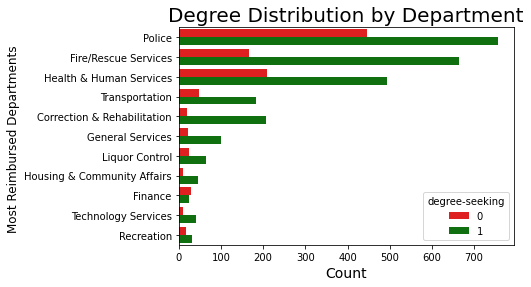

In [48]:
sns.countplot(y = 'Department', data = class_df_grouped, hue='degree-seeking',color='blue',palette=['red','green'])
plt.title('Degree Distribution by Department', size = 20)
plt.xlabel('Count', fontsize = 14)
plt.ylabel('Most Reimbursed Departments ', fontsize = 12)


In [49]:
class_df_graph['degree-seeking'] = class_df_graph['degree-seeking'].astype(str)

class_df_graph.loc[class_df_graph['degree-seeking']=='1','degree-seeking'] = 'degree-seeking'
class_df_graph.loc[class_df_graph['degree-seeking']=='0','degree-seeking'] = 'non-degree-seeking'

class_df_graph


,Department,Major,Degree,Course Title,School,Cost,Course Description,STEM,degree-seeking
0,Police,Business/Admin./Mgmt.,AA,INTRODUCTION TO BUSINESS,Montgomery College,392.0,An introductory course designed to survey the ...,Non-STEM,degree-seeking
1,Police,Business/Admin./Mgmt.,AA,MA 160,Montgomery College,392.0,A general calculus course primarily for busine...,Non-STEM,degree-seeking
2,Police,Business/Admin./Mgmt.,AA,INTRO TO AMERICAN MUSIC,Montgomery College,392.0,A survey of American popular music from the tu...,Non-STEM,degree-seeking
3,Health & Human Services,Business/Admin./Mgmt.,Masters (MA/MS/MPH/etc.),PUBLIC POLICY ANALYSIS,BOWIE STATE UNIVERSITY,1062.0,Focus is on the analysis of costs and benefits...,Non-STEM,degree-seeking
4,Health & Human Services,Other/Misc.,Masters (MA/MS/MPH/etc.),MHA 500 CONTEMPORARY ISSUES IN HEALTH CARE,Mount St Mary's University,1569.0,"The historical, current, and future organizati...",Non-STEM,degree-seeking
...,...,...,...,...,...,...,...,...,...
4023,Police,Not Specified,Certificate,LWRCI M6/IC ARMORER COURSE,LWRC International,600.0,The LWRCI armorer course is designed to equip ...,Non-STEM,non-degree-seeking
4024,Correction & Rehabilitation,Not Listed,Bachelors (BA/BS),TLMT311 INTRODUCTION TO TRANSPORTATION MANAGEMENT,American Public University System,700.0,This course is an overview of the transportati...,Non-STEM,degree-seeking
4025,Health & Human Services,Psychology,Certificate,FUNDAMENTALS OF SUPERVISION,American Association for Marriage and Family T...,750.0,As part of the application process to become a...,Non-STEM,non-degree-seeking
4026,Fire/Rescue Services,Public Administration,Masters (MA/MS/MPH/etc.),LEADERSHIP IN THE PUBLIC SECTOR,Purdue University,1830.0,leadership COURSE FOR MY MASTERS DEGREE IN PUB...,Non-STEM,degree-seeking


<Figure size 576x360 with 0 Axes>

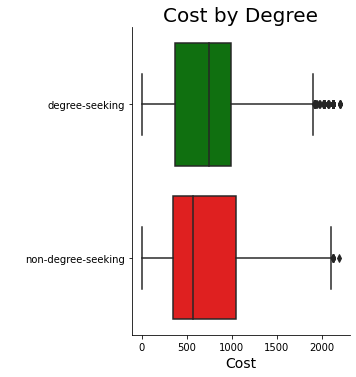

In [79]:
plt.figure(figsize = (8, 5))
# sns.catplot(y = 'Degree', x = 'Cost', kind = 'box', data = class_df_graph,hue='degree seeking',palette=['red','green'])
# sns.catplot(y = 'Degree', x = 'Cost', kind = 'box', data = class_df_graph)
sns.catplot(y = 'degree-seeking', x = 'Cost', kind = 'box', data = class_df_graph,palette=['green','red'])
plt.title('Cost by Degree', fontsize = 20)
plt.xlabel('Cost', fontsize = 14)
plt.ylabel(' ', fontsize = 14)
plt.show()

### Heat Map

In [51]:
class_df_graph

,Department,Major,Degree,Course Title,School,Cost,Course Description,STEM,degree-seeking
0,Police,Business/Admin./Mgmt.,AA,INTRODUCTION TO BUSINESS,Montgomery College,392.0,An introductory course designed to survey the ...,Non-STEM,degree-seeking
1,Police,Business/Admin./Mgmt.,AA,MA 160,Montgomery College,392.0,A general calculus course primarily for busine...,Non-STEM,degree-seeking
2,Police,Business/Admin./Mgmt.,AA,INTRO TO AMERICAN MUSIC,Montgomery College,392.0,A survey of American popular music from the tu...,Non-STEM,degree-seeking
3,Health & Human Services,Business/Admin./Mgmt.,Masters (MA/MS/MPH/etc.),PUBLIC POLICY ANALYSIS,BOWIE STATE UNIVERSITY,1062.0,Focus is on the analysis of costs and benefits...,Non-STEM,degree-seeking
4,Health & Human Services,Other/Misc.,Masters (MA/MS/MPH/etc.),MHA 500 CONTEMPORARY ISSUES IN HEALTH CARE,Mount St Mary's University,1569.0,"The historical, current, and future organizati...",Non-STEM,degree-seeking
...,...,...,...,...,...,...,...,...,...
4023,Police,Not Specified,Certificate,LWRCI M6/IC ARMORER COURSE,LWRC International,600.0,The LWRCI armorer course is designed to equip ...,Non-STEM,non-degree-seeking
4024,Correction & Rehabilitation,Not Listed,Bachelors (BA/BS),TLMT311 INTRODUCTION TO TRANSPORTATION MANAGEMENT,American Public University System,700.0,This course is an overview of the transportati...,Non-STEM,degree-seeking
4025,Health & Human Services,Psychology,Certificate,FUNDAMENTALS OF SUPERVISION,American Association for Marriage and Family T...,750.0,As part of the application process to become a...,Non-STEM,non-degree-seeking
4026,Fire/Rescue Services,Public Administration,Masters (MA/MS/MPH/etc.),LEADERSHIP IN THE PUBLIC SECTOR,Purdue University,1830.0,leadership COURSE FOR MY MASTERS DEGREE IN PUB...,Non-STEM,degree-seeking


In [52]:
class_df_heat = class_df_graph.copy(deep=True)
class_df_heat['degree-seeking'] = class_df_heat['degree-seeking'].replace(["degree-seeking", "non-degree-seeking"],[1,0])
class_df_heat['STEM'] = class_df_heat['STEM'].replace(['STEM','Non-STEM'], [1,0])

#data[10:1000]

In [53]:
class_df_heat

,Department,Major,Degree,Course Title,School,Cost,Course Description,STEM,degree-seeking
0,Police,Business/Admin./Mgmt.,AA,INTRODUCTION TO BUSINESS,Montgomery College,392.0,An introductory course designed to survey the ...,0,1
1,Police,Business/Admin./Mgmt.,AA,MA 160,Montgomery College,392.0,A general calculus course primarily for busine...,0,1
2,Police,Business/Admin./Mgmt.,AA,INTRO TO AMERICAN MUSIC,Montgomery College,392.0,A survey of American popular music from the tu...,0,1
3,Health & Human Services,Business/Admin./Mgmt.,Masters (MA/MS/MPH/etc.),PUBLIC POLICY ANALYSIS,BOWIE STATE UNIVERSITY,1062.0,Focus is on the analysis of costs and benefits...,0,1
4,Health & Human Services,Other/Misc.,Masters (MA/MS/MPH/etc.),MHA 500 CONTEMPORARY ISSUES IN HEALTH CARE,Mount St Mary's University,1569.0,"The historical, current, and future organizati...",0,1
...,...,...,...,...,...,...,...,...,...
4023,Police,Not Specified,Certificate,LWRCI M6/IC ARMORER COURSE,LWRC International,600.0,The LWRCI armorer course is designed to equip ...,0,0
4024,Correction & Rehabilitation,Not Listed,Bachelors (BA/BS),TLMT311 INTRODUCTION TO TRANSPORTATION MANAGEMENT,American Public University System,700.0,This course is an overview of the transportati...,0,1
4025,Health & Human Services,Psychology,Certificate,FUNDAMENTALS OF SUPERVISION,American Association for Marriage and Family T...,750.0,As part of the application process to become a...,0,0
4026,Fire/Rescue Services,Public Administration,Masters (MA/MS/MPH/etc.),LEADERSHIP IN THE PUBLIC SECTOR,Purdue University,1830.0,leadership COURSE FOR MY MASTERS DEGREE IN PUB...,0,1


In [54]:
class_df_heat.corr()

,Cost,STEM,degree-seeking
Cost,1.000000,0.021907,0.057714
STEM,0.021907,1.000000,0.119538
degree-seeking,0.057714,0.119538,1.000000


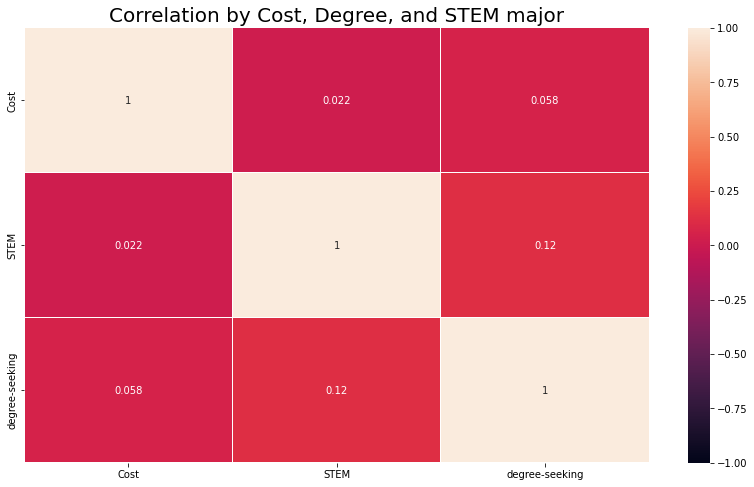

In [55]:
plt.figure(figsize = (14, 8))
plt.title('Correlation by Cost, Degree, and STEM major', size = 20)
# sns.heatmap(class_df_heat.corr(), annot = True)
sns.heatmap(class_df_heat.corr(), annot = True, linewidths = .1, vmin = -1, vmax = 1)


## Logistic Regression


In [56]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [57]:
LogReg = LogisticRegression()


scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

LogReg.fit(X_train,y_train)


y_pred = LogReg.predict(X_test)

In [58]:
print('Classes', LogReg.classes_)
print('Intercept',LogReg.intercept_)
print("Coefficients", LogReg.coef_ )

Classes [0 1]
Intercept [1.40647087]
Coefficients [[-5.64430550e-02  1.29919667e-01  2.66720717e-01  1.80725699e-01
   1.02220230e-01  5.85760638e-01  2.54711023e-01  6.98431395e-02
   1.30641203e-01  1.87417248e-01  1.26293218e-01  4.01923745e-01
   1.28450325e+00  5.80001429e-01  7.47148416e-01  3.79607100e-01
   2.28231611e-02 -1.20298171e-02  1.93904457e-02  2.07024943e-01
   1.18077295e-01  2.83381516e-01  3.32185878e-01  9.35479313e-02
   1.49767569e-01  1.01678755e+00 -3.18782104e-02  2.21069629e-01
  -4.57648978e-02  4.23795481e-01  3.12541833e-01  1.77688861e-01
   3.47982229e-01 -8.62313412e-02 -1.22231763e-01  6.21093757e-01
   4.40387934e-01  4.14240454e-01  2.45924487e-01 -5.56586058e-02
   4.43357907e-01  4.18267856e-01 -1.48364783e-01 -1.96151269e-01
   2.46492481e-01 -1.47987907e-01  1.43899063e-01 -1.40647055e-01
  -8.26678246e-02 -8.27479637e-02 -8.29163614e-02 -8.63849937e-02
  -1.65640602e-01 -8.35914359e-02 -3.46978741e-01 -2.99772981e-01
  -1.77958514e-01 -8.21636

In [59]:
print("Accuracy", LogReg.score(X_test, y_test))
print(classification_report(y_test, LogReg.predict(X_test)))

Accuracy 0.8967229394240318
              precision    recall  f1-score   support

           0       0.90      0.72      0.80       288
           1       0.90      0.97      0.93       719

    accuracy                           0.90      1007
   macro avg       0.90      0.84      0.87      1007
weighted avg       0.90      0.90      0.89      1007



In [60]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[208,  80],
       [ 24, 695]])

Text(0.5, 257.44, 'Predicted label')

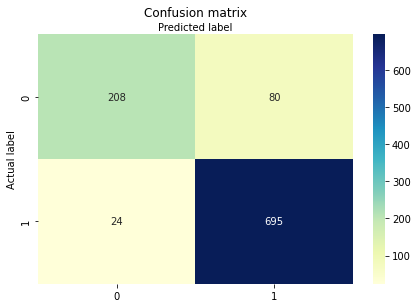

In [61]:
categories = [0,1] 
fig, ax = plt.subplots()
plt.xticks([0,1], categories)
plt.yticks([0,1], categories)
# create heatmap
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [62]:

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Accuracy: 0.8967229394240318
Precision: 0.896774193548387
Recall: 0.9666203059805285


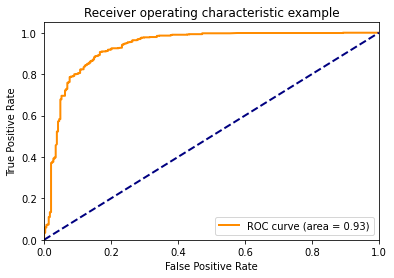

In [63]:
y_pred_proba = LogReg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
        lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Feature: 0, Score: -0.05644
Feature: 1, Score: 0.12992
Feature: 2, Score: 0.26672
Feature: 3, Score: 0.18073
Feature: 4, Score: 0.10222
Feature: 5, Score: 0.58576
Feature: 6, Score: 0.25471
Feature: 7, Score: 0.06984
Feature: 8, Score: 0.13064
Feature: 9, Score: 0.18742
Feature: 10, Score: 0.12629
Feature: 11, Score: 0.40192
Feature: 12, Score: 1.28450
Feature: 13, Score: 0.58000
Feature: 14, Score: 0.74715
Feature: 15, Score: 0.37961
Feature: 16, Score: 0.02282
Feature: 17, Score: -0.01203
Feature: 18, Score: 0.01939
Feature: 19, Score: 0.20702
Feature: 20, Score: 0.11808
Feature: 21, Score: 0.28338
Feature: 22, Score: 0.33219
Feature: 23, Score: 0.09355
Feature: 24, Score: 0.14977
Feature: 25, Score: 1.01679
Feature: 26, Score: -0.03188
Feature: 27, Score: 0.22107
Feature: 28, Score: -0.04576
Feature: 29, Score: 0.42380
Feature: 30, Score: 0.31254
Feature: 31, Score: 0.17769
Feature: 32, Score: 0.34798
Feature: 33, Score: -0.08623
Feature: 34, Score: -0.12223
Feature: 35, Score: 0.62

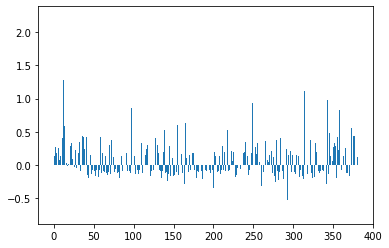

In [98]:
# get importance
#importance = model.coef_[0]
importance = LogReg.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
      print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
#pyplot.bar([x for x in range(len(importance))], importance)
#pyplot.show()
plt.bar([x for x in range(len(importance))], importance)
plt.show()


In [100]:
print(LogReg.coef_)
print(X_train.columns)

[[-5.64430550e-02  1.29919667e-01  2.66720717e-01  1.80725699e-01
   1.02220230e-01  5.85760638e-01  2.54711023e-01  6.98431395e-02
   1.30641203e-01  1.87417248e-01  1.26293218e-01  4.01923745e-01
   1.28450325e+00  5.80001429e-01  7.47148416e-01  3.79607100e-01
   2.28231611e-02 -1.20298171e-02  1.93904457e-02  2.07024943e-01
   1.18077295e-01  2.83381516e-01  3.32185878e-01  9.35479313e-02
   1.49767569e-01  1.01678755e+00 -3.18782104e-02  2.21069629e-01
  -4.57648978e-02  4.23795481e-01  3.12541833e-01  1.77688861e-01
   3.47982229e-01 -8.62313412e-02 -1.22231763e-01  6.21093757e-01
   4.40387934e-01  4.14240454e-01  2.45924487e-01 -5.56586058e-02
   4.43357907e-01  4.18267856e-01 -1.48364783e-01 -1.96151269e-01
   2.46492481e-01 -1.47987907e-01  1.43899063e-01 -1.40647055e-01
  -8.26678246e-02 -8.27479637e-02 -8.29163614e-02 -8.63849937e-02
  -1.65640602e-01 -8.35914359e-02 -3.46978741e-01 -2.99772981e-01
  -1.77958514e-01 -8.21636734e-02  4.26568033e-01  2.72372145e-01
  -1.26806

In [142]:
LR_coef = LogReg.coef_
LR_coef = np.transpose(LR_coef)
LR_coef_df = pd.DataFrame(LR_coef)

In [143]:

LR_coef_df.rename(columns={0:'Coefficient'},inplace=True)
LR_coef_df

,Coefficient
0,-0.056443
1,0.129920
2,0.266721
3,0.180726
4,0.102220
5,0.585761
6,0.254711
7,0.069843
8,0.130641
9,0.187417


In [144]:
feat_labels = X_train.columns.to_frame().reset_index(drop=True)
feat_labels.rename(columns={0:'Feature'},inplace=True)
feat_labels_df = feat_labels.join(LR_coef_df)
feat_labels_df

,Feature,Coefficient
0,Cost,-0.056443
1,Department_Board of Elections,0.129920
2,Department_Community Engagement Cluster,0.266721
3,Department_Community Use Public Facilities,0.180726
4,Department_Consumer Protection,0.102220
5,Department_Correction & Rehabilitation,0.585761
6,Department_County Attorney,0.254711
7,Department_County Council,0.069843
8,Department_County Executive,0.130641
9,Department_Emergency Mgmt & Homeland Security,0.187417


In [145]:
feat_labels_df = feat_labels_df.reindex(feat_labels_df['Coefficient'].abs().sort_values(ascending=False).index)
# df.reindex(df.b.abs().sort_values().index)
feat_labels_graph = feat_labels_df[0:30]

In [146]:
feat_labels_graph

,Feature,Coefficient
359,School_University of Maryland - University Col...,2.241320
12,Department_Fire/Rescue Services,1.284503
314,School_STRAYER UNIVERSITY,1.119135
25,Department_Police,1.016788
343,School_UNIVERSITY OF BALTIMORE,0.974886
249,School_Montgomery College,0.927190
97,School_COLUMBIA SOUTHERN UNIVERSITY,0.864470
358,School_University of Maryland - College Park,0.825735
79,School_BOWIE STATE UNIVERSITY,0.757997
14,Department_Health & Human Services,0.747148


Text(0.5, 1.0, 'Logistic Regression Coefficients by absolute value')

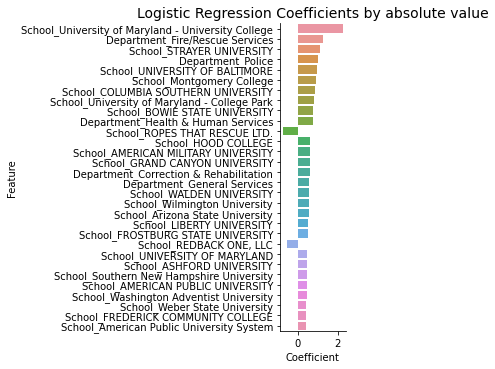

In [147]:
sns.catplot(kind='bar',data=feat_labels_graph,y='Feature',x='Coefficient',orient='h')      
plt.title('Logistic Regression Coefficients by absolute value', fontsize = 14)

## Decision Tree using Entropy


In [72]:
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2,random_state=99)

clf = DecisionTreeClassifier(criterion='entropy', random_state=99)

In [73]:
clf.fit(X_train,y_train)
y_pred= clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9106699751861043


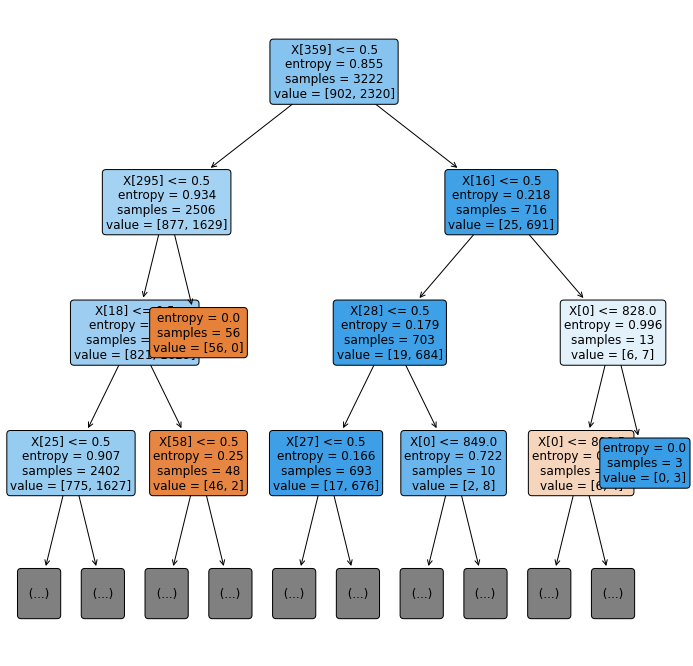

In [74]:
from sklearn import tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 12))
# tree.plot_tree(decision_tree=clf, max_depth= 3,fontsize=12,filled=True);

tree.plot_tree(decision_tree = clf, max_depth = 3, fontsize = 12, filled = True, rounded = True);

### Importances

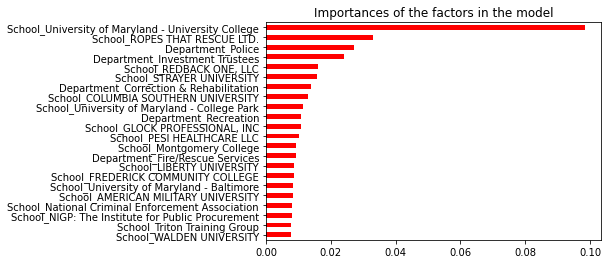

In [93]:
importancesDT = pd.Series(data=clf.feature_importances_, index=X_train.columns)
importances_sortedDT = importancesDT.sort_values()
isDT = importances_sortedDT[-23:-1]
isDT.plot(kind='barh', color='red')
plt.title('Importances of the factors in the model')
plt.show()

## Decision Tree with gini

In [75]:
clf2 = DecisionTreeClassifier(criterion='gini', random_state=99)

In [76]:
clf2.fit(X_train,y_train)
y_pred2 = clf2.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9106699751861043


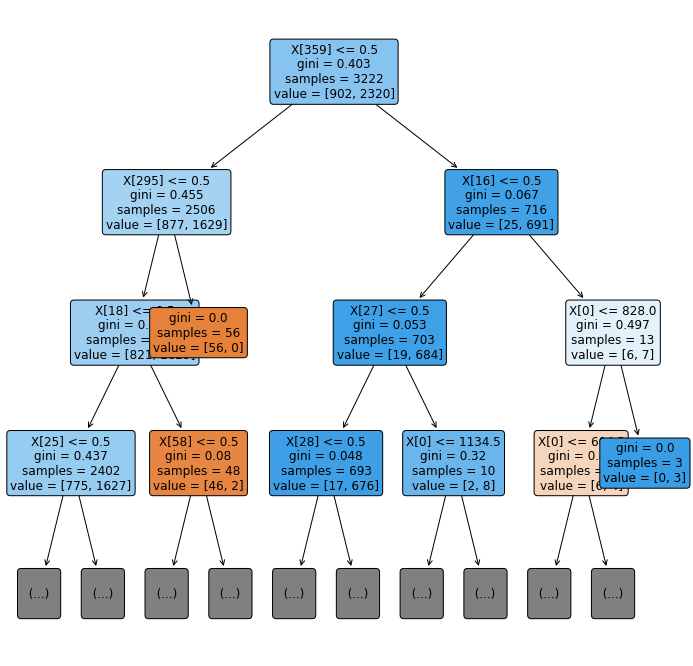

In [77]:
fig, ax = plt.subplots(figsize=(12, 12))
# tree.plot_tree(decision_tree = clf2, max_depth= 3,fontsize=12,filled=True);

tree.plot_tree(decision_tree = clf2, max_depth = 3, fontsize = 12, filled = True, rounded = True);